# Generate Daily Release Plots
Daily release plots show the metered release rate over the course of one day of testing. Vertical lines indicate when an operator conducted an overpass, with color indicating how the data collected from that overpass was filtered through both Stanford and operator QC requirements.
- Code author: Sahar H. El Abbadi
- Date started: 2023-03-08
- Date last edited: 2023-03-13

# Data Description

Metered data for all airplane testing days is saved in the directory "daily_meter_data". Generate by Philippine Burdeau from Coriolis meter raw data and cleaned in the data processing pipeline.

Columns:
- Date and time are in UTC
- Release rate is in kg/h
- Coriolis Meter (for sensor and transmitter identification numbers and serial numbers, see methods documentation):
    - Baby Corey refers to CMFS015H meter
    - Mama Corey refers to CMF050M meter
    - Papa Corey refres to CMFS150M meter
- QC Flags:
    - 0: no QC flag, original data is good quality
    - 1: non-testing period
    - 2: original data missing, filled as described in data analysis section of methods documentation
    - 3: original data value is below accuracy threshold and replaced with NA


In [1]:
from methods_source import load_flight_days, generate_daily_releases
from plot_methods import plot_daily_releases

# load operator flight days:
load_flight_days()


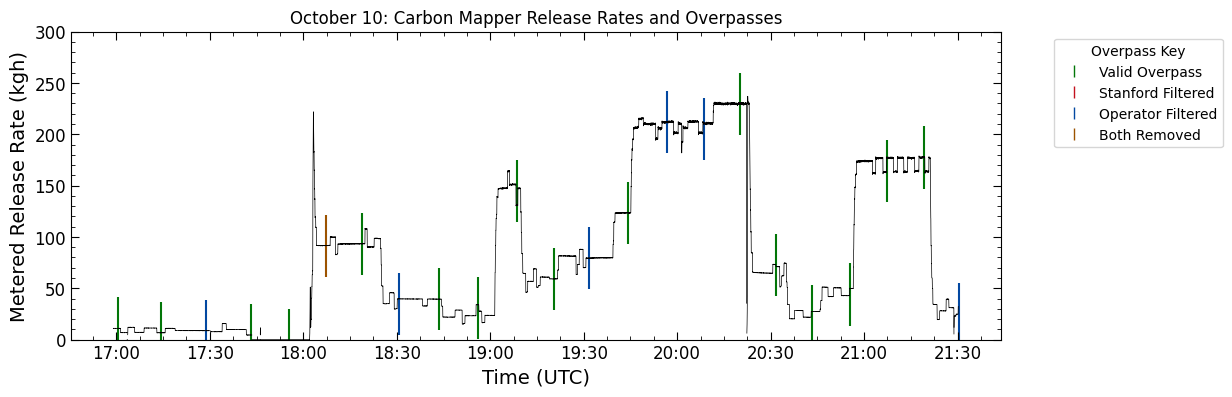

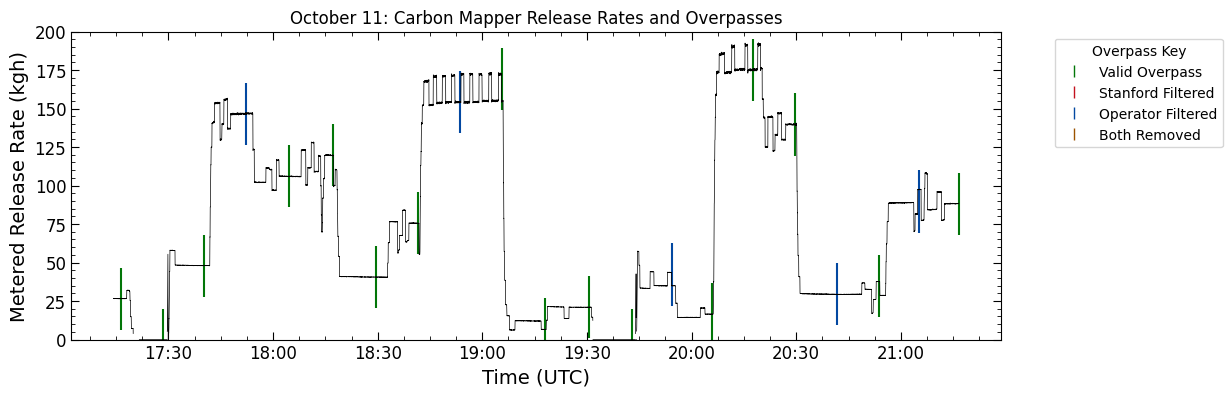

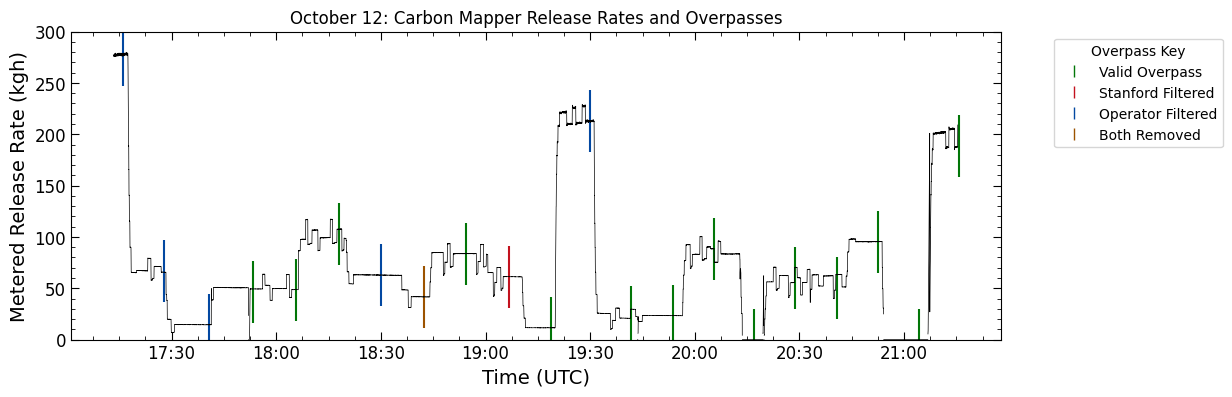

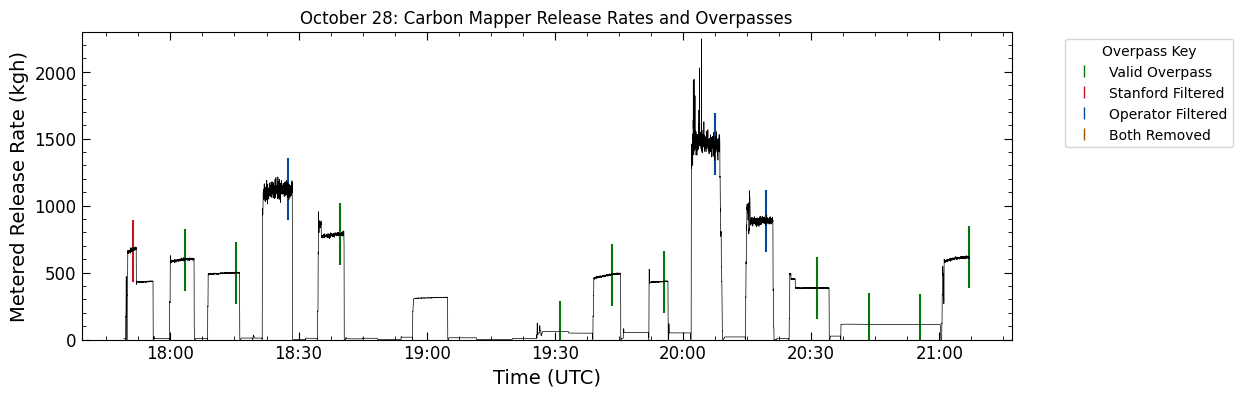

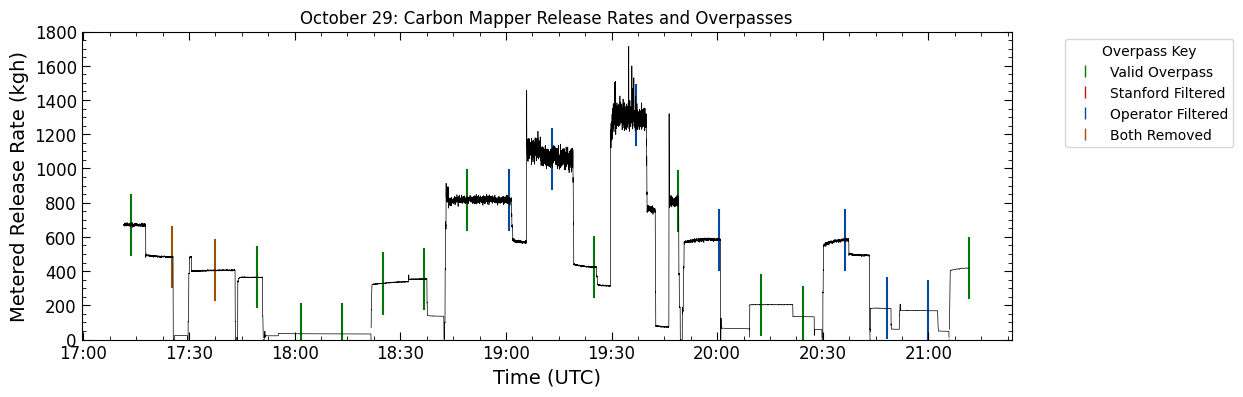

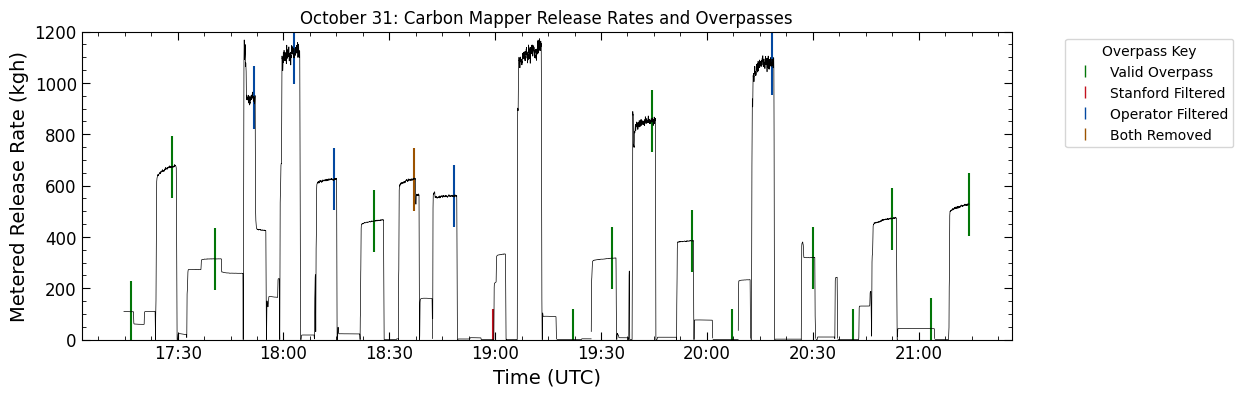

In [2]:
operator = 'Carbon Mapper'

plot_daily_releases(operator, stage=1, strict_discard=False, time_ave=60, gas_comp_source='km')

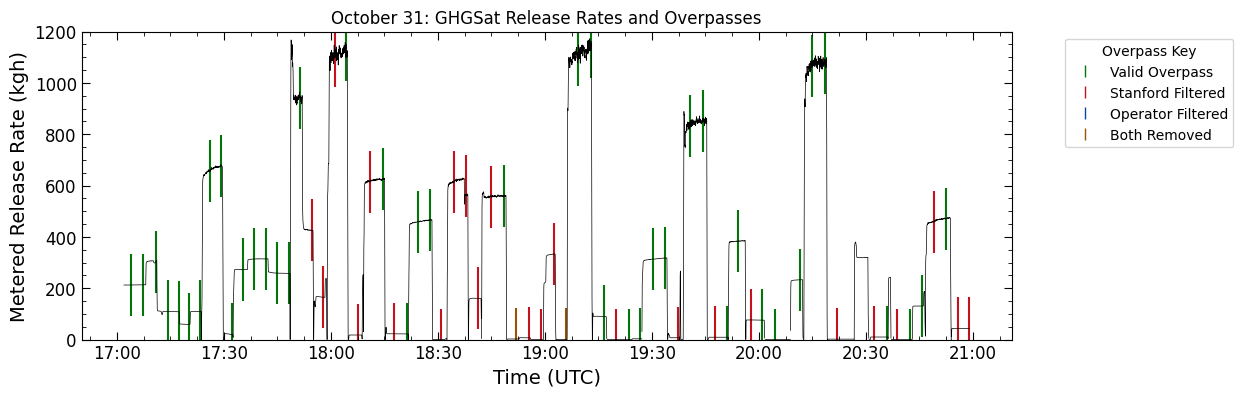

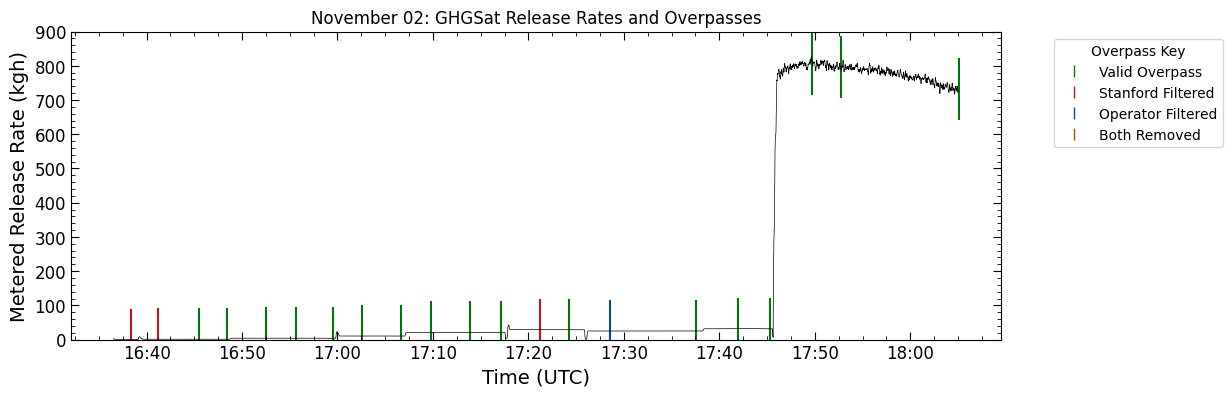

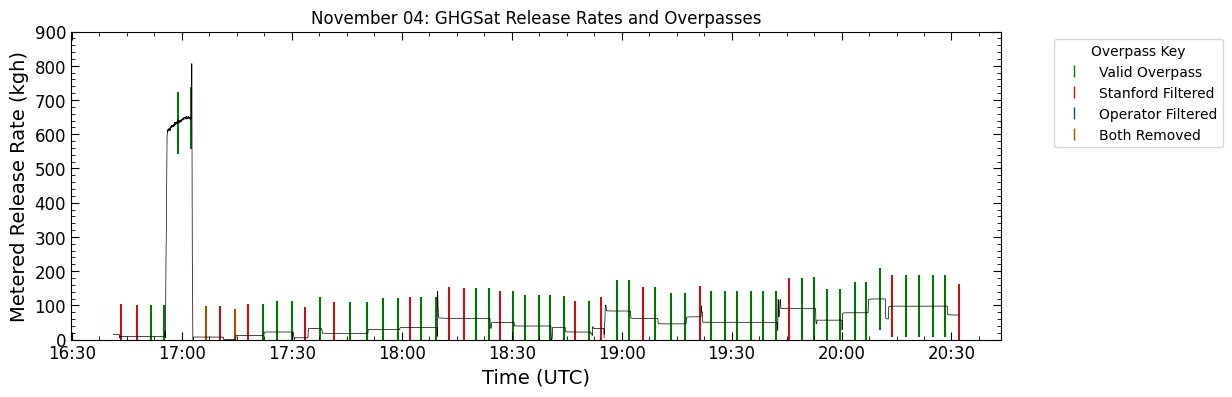

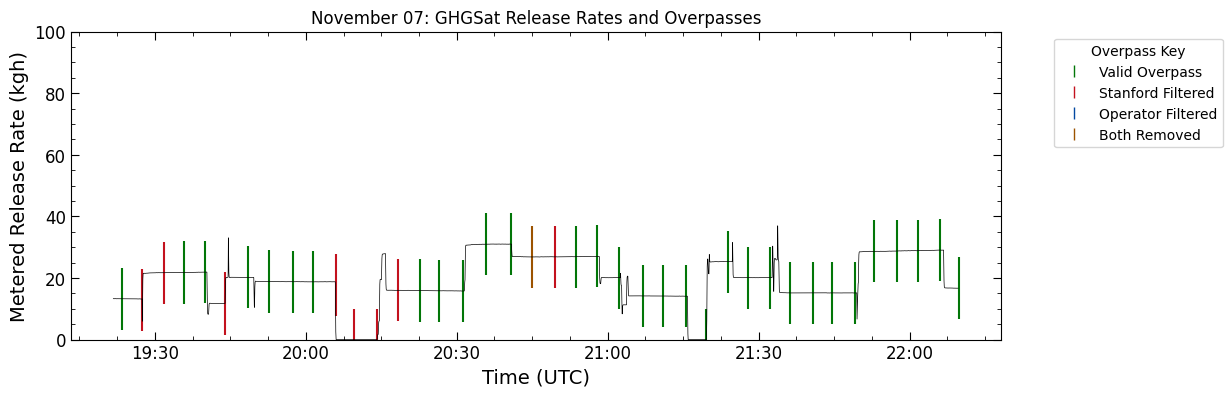

In [3]:
# GHGSat

operator = 'GHGSat'
plot_daily_releases(operator, stage=1, strict_discard=False, time_ave=60, gas_comp_source='km')


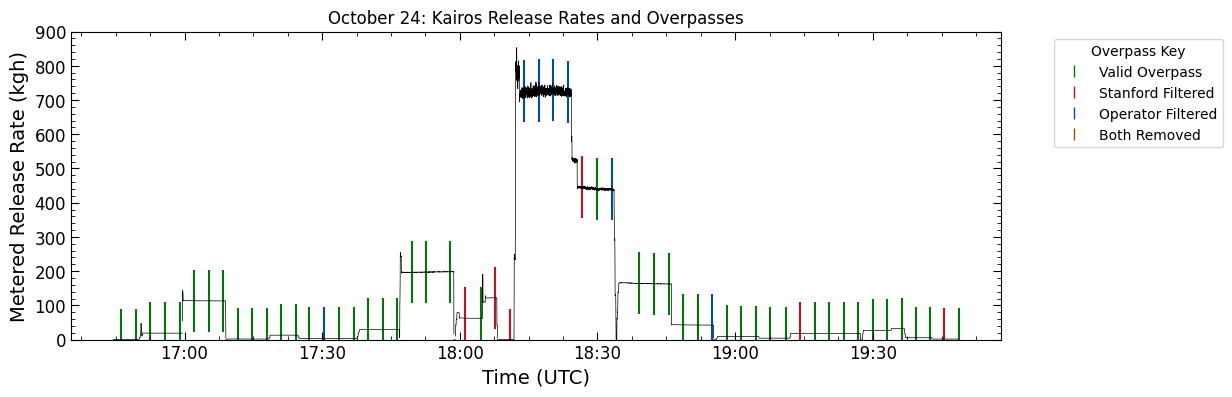

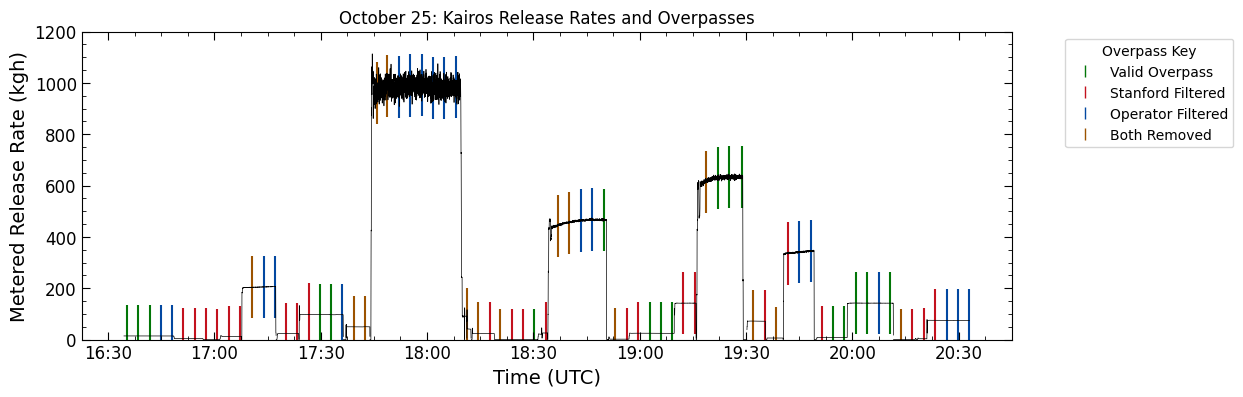

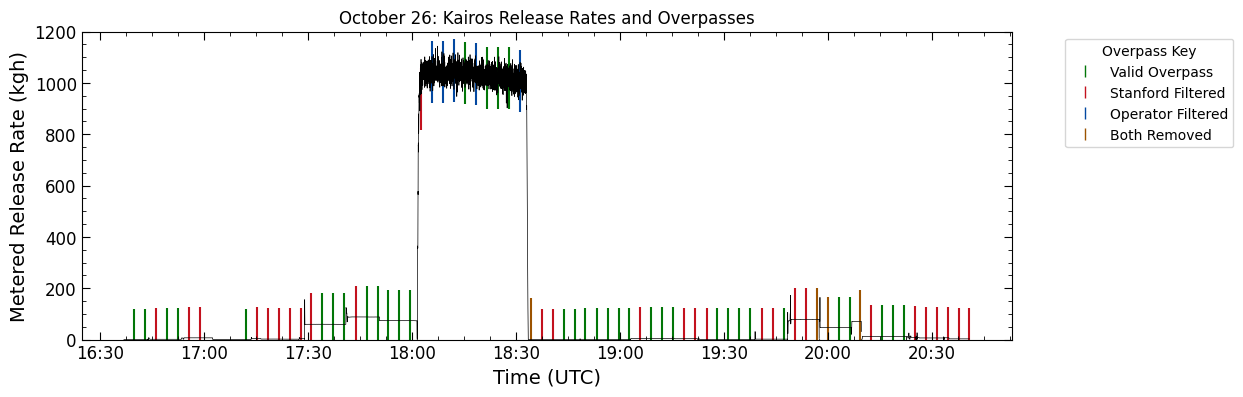

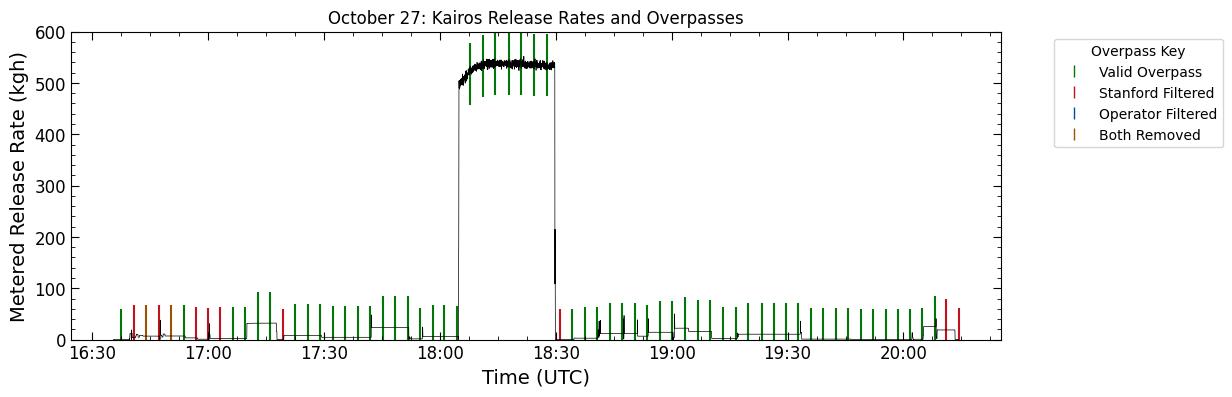

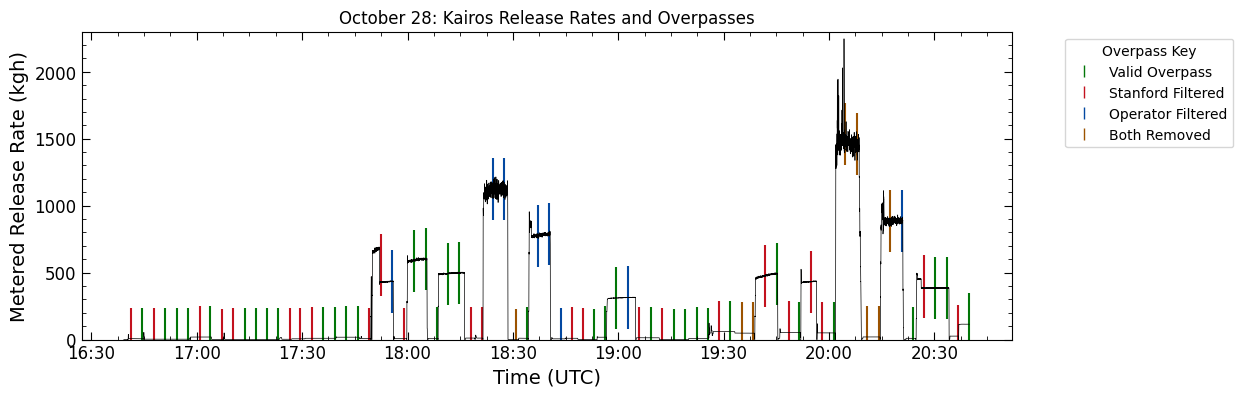

In [4]:
# Kairos

operator = 'Kairos'
plot_daily_releases(operator, stage=1, strict_discard=False, time_ave=60, gas_comp_source='km')

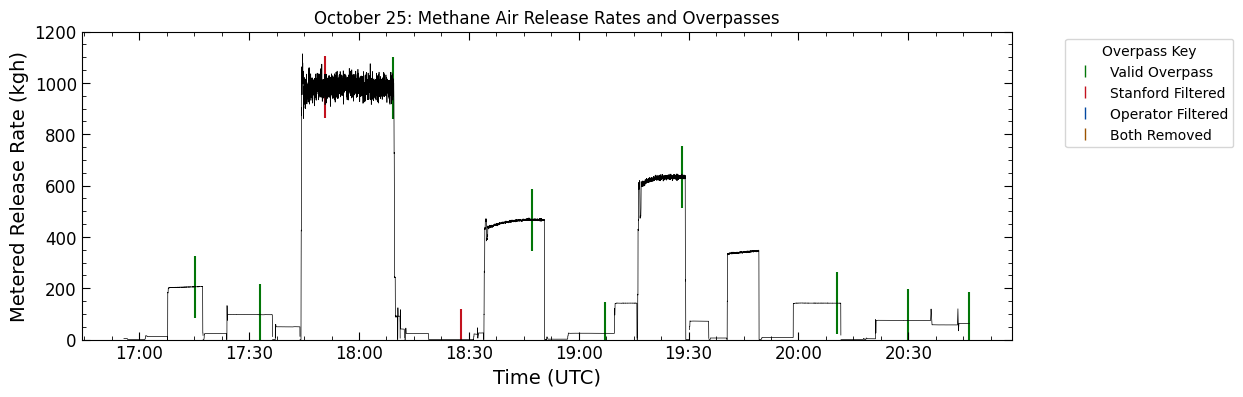

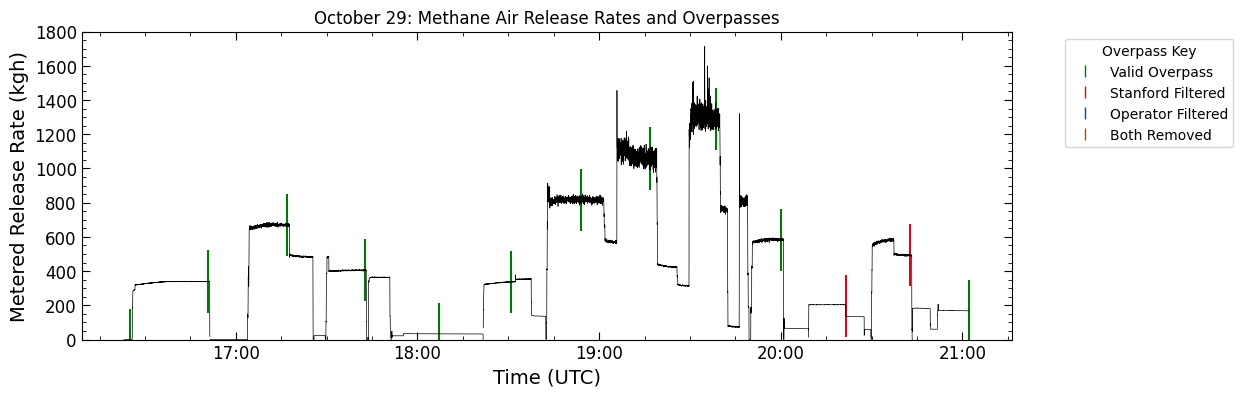

In [5]:
# Methane Air

operator = 'Methane Air'
plot_daily_releases(operator, stage=1, strict_discard=False, time_ave=60, gas_comp_source='km')

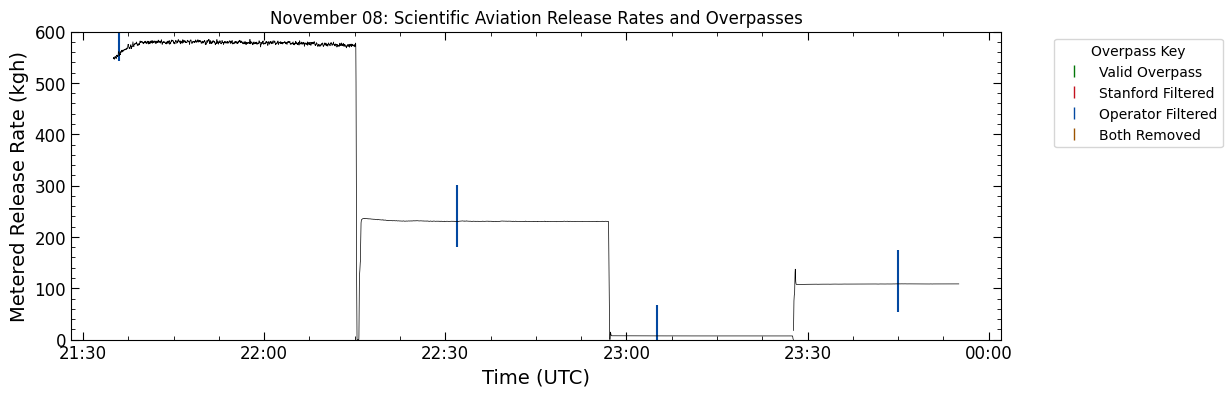

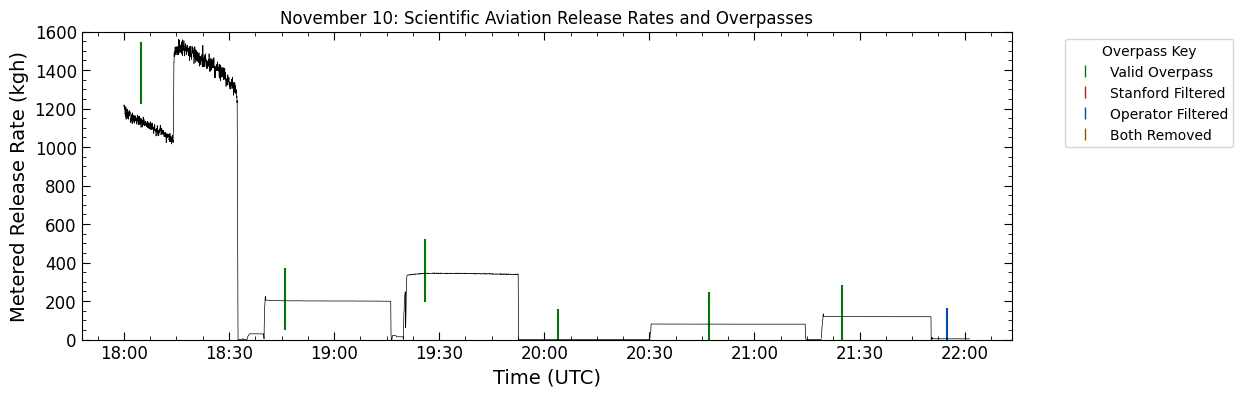

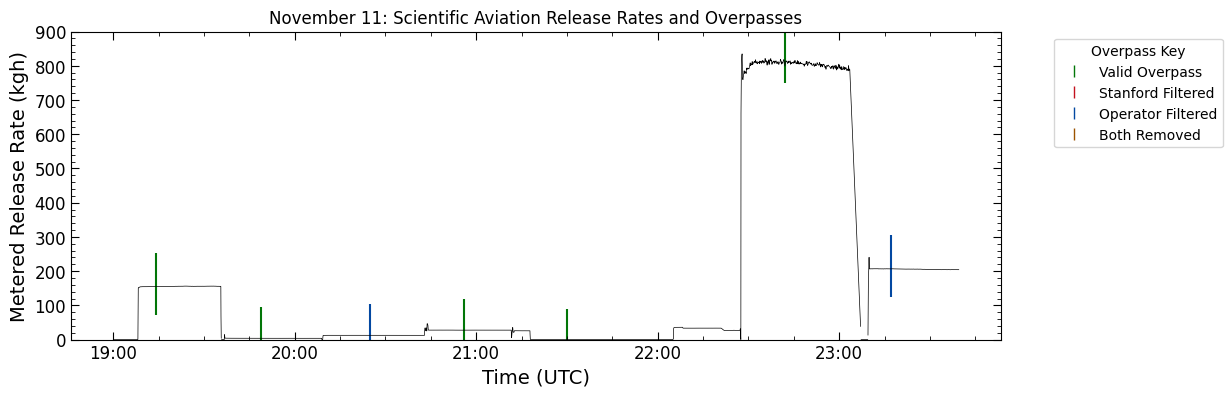

In [6]:
# Scientific Aviation

operator = 'Scientific Aviation'
plot_daily_releases(operator, stage=1, strict_discard=False, time_ave=60, gas_comp_source='km')


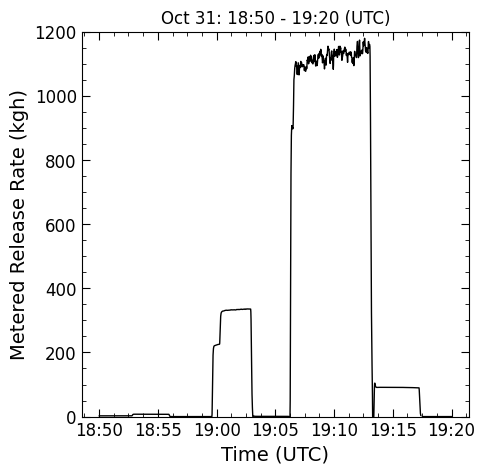

In [1]:
import pandas as pd
import pathlib
import datetime
from plot_methods import plot_selected_release_period
#
# def plot_selected_release_period(start_t, stop_t, gas_comp_source='km'):
#     """Plot flow rate (kgh CH4) for a given input period."""
#     #TODO duplicate code with calc_average_release -> turn into functions later
#     if start_t.date() != stop_t.date():
#         # End function if start and end t are on different dates
#         print(
#             "I can't currently plot data with start and end time on different dates. Why are you trying to do this anyway?")
#         return
#     elif start_t.date() > stop_t.date():
#         print('Start time is after end time. Time for *you* to do some debugging!')
#         return
#     else:
#         # Load data
#         file_name = start_t.strftime('%m_%d')
#         # use subclass Path (instead of PurePath) because we need to check if the file exists
#         file_path = pathlib.Path('02_meter_data', 'daily_meter_data', 'whole_gas_clean',
#                                      f'{gas_comp_source}', f'{file_name}.csv')
#     if not file_path.is_file():
#         # If file does not exist, we did not conduct releases on that day.
#         # Set all values of results_summary to zero or np.nan
#         print('No gas released on selected date.')
#         return
#
#     meter_data = pd.read_csv(file_path, index_col=0, parse_dates=['datetime_utc'])
#     time_ave_mask = (meter_data['datetime_utc'] > start_t) & (meter_data['datetime_utc'] <= stop_t)
#     selected_period = meter_data.loc[time_ave_mask].copy()
#
#     x_data = selected_period.datetime_utc
#     y_data = selected_period.methane_kgh
#     kgh_max = math.ceil(max(y_data) / 100) * 100  # Max kgh rounded to nearest 100
#
#     # Initialize Figure
#     fig, ax = plt.subplots(1, figsize=(5, 5))
#     plt.plot(x_data, y_data, color='black',
#          linewidth=1)
#     # Set y-axis limits
#     ax.set(ylim=(0, kgh_max))
#
#     test_date = start_t.strftime('%b %d')
#     start_string = start_t.strftime('%H:%M')
#     stop_string = stop_t.strftime('%H:%M')
#     # Title
#     plt.title(f'{test_date}: {start_string} - {stop_string} (UTC)')
#
#     # Format axes
#     ax.xaxis.set_major_formatter(mdates.DateFormatter("%H:%M"))
#     plt.xlabel('Time (UTC)', fontsize=14)
#     plt.ylabel('Metered Release Rate (kgh)', fontsize=14)
#     plt.tick_params(direction='in', right=True, top=True)
#     plt.tick_params(labelsize=12)
#     plt.minorticks_on()
#     plt.tick_params(labelbottom=True, labeltop=False, labelright=False, labelleft=True)
#     plt.tick_params(direction='in', which='minor', length=3, bottom=True, top=True, left=True, right=True)
#     plt.tick_params(direction='in', which='major', length=6, bottom=True, top=True, left=True, right=True)
#
#     # Save Fig
#     plot_period = start_t.strftime('%m-%d_%H%m')
#     now = datetime.datetime.now()
#     save_time = now.strftime("%Y%m%d")
#     fig_name = f'release_chart_{plot_period}_saved_{save_time}'
#     fig_path = pathlib.PurePath('04_figures', 'misc_flow_rate_plots', fig_name)
#     plt.savefig(fig_path, bbox_inches='tight')
#     plt.show()

start_time = datetime.datetime(2022, 10, 31, 18, 50, 0)
end_time = datetime.datetime(2022, 10, 31, 19, 20, 0)
plot_selected_release_period(start_time, end_time)